# Backbone

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../")

from MapSci.papers import papers
from MapSci.research_space import research_space

In [3]:
areas = pd.read_pickle("../dataset/SJR/areas.pkl")
dict_area = areas[["Field", "Classification"]].set_index("Field").to_dict()["Classification"]

In [4]:
pp = papers("intermediate", dict_area)
maps = research_space("intermediate", pp)

In [5]:
maps.compute(2000, 2017, model="chinazzi")

chinazzi(2000, 2017, 0.1, 200)


In [11]:
maps.compute(2012, 2016, model="chinazzi")

chinazzi(2012, 2016, 0.1, 200)


In [9]:
fields = maps.phi["chinazzi(2000, 2017, 0.1, 200)"][1].keys()
dict_area = areas[["Classification", "Subject area"]].set_index("Classification").to_dict()["Subject area"]
unique = areas["Subject area"].unique()
subs = {u: v for v,u in enumerate(sorted(unique))}
values = [subs[dict_area[node]] for node in fields]

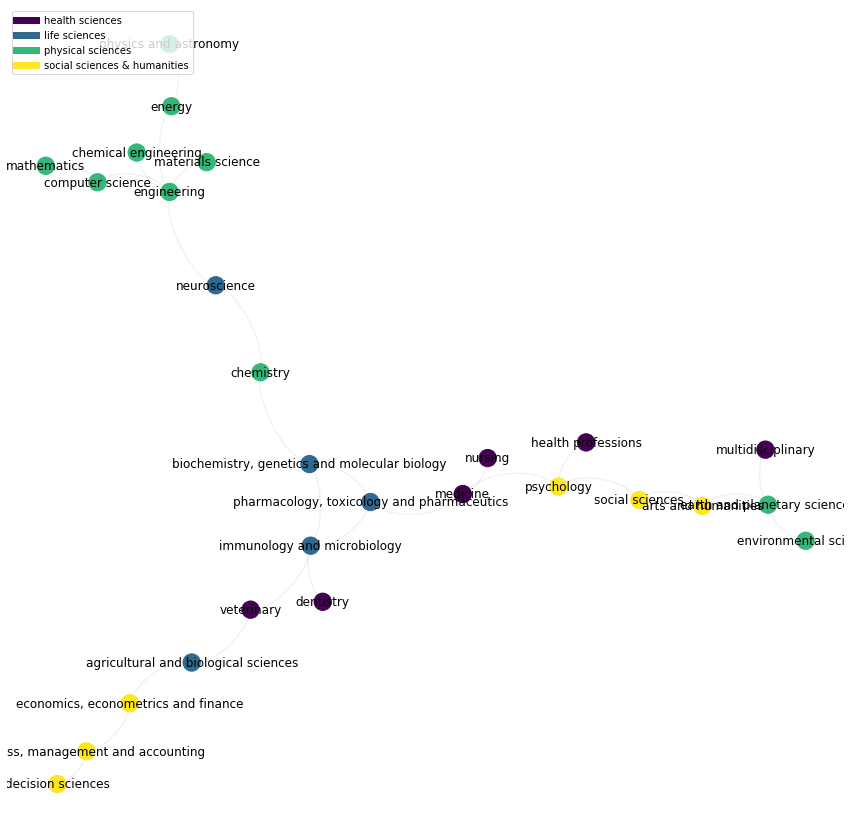

In [19]:
pos = maps.plot("chinazzi(2000, 2017, 0.1, 200)", values, labels=subs, new=True, threshold=0.9, with_labels=True)

In [6]:
bb = maps.get_backbone("chinazzi(2000, 2017, 0.1, 200)", alpha=0.18)

In [141]:
trans = {str(x):values[x] for x in range(27)}
v = [trans[x] for x in bb.nodes]

ffs = [x if x != 'chemical engineering' else 'CENG' for x in fields]
t = {str(x):ffs[x][:4].upper() for x in range(27)}

edges,weights = zip(*nx.get_edge_attributes(bb,'weight').items())
weights = ['black' if x == 1 else 'red' for x in weights]

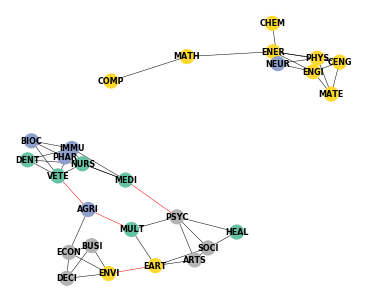

In [83]:
plt.rcParams["figure.figsize"] = (4.9,4)
nx.draw(bb, node_color=v, labels=t, edgelist=edges, edge_color=weights, node_size=200, width=0.5, cmap='Set2',
        font_size=8, font_color='black', font_weight=580, pos=nx.spring_layout(bb,k=0.35,iterations=50))

In [7]:
import numpy as np
import matplotlib.cm as cmx
import matplotlib.patheffects as path_effects

In [9]:
dict_area = areas[["Classification", "Subject area"]].set_index("Classification").to_dict()["Subject area"]
unique = areas["Subject area"].unique()
subs = {u: v for v,u in enumerate(sorted(unique))}

def draw_one(ax, init, end, alpha=0.05):
    maps.compute(init, end, model="chinazzi")
    model = "chinazzi({}, {}, 0.1, 200)".format(init, end)
    
    fields = maps.phi[model][1].keys()
    values = [subs[dict_area[node]] for node in fields]
    trans = {str(x):values[x] for x in range(27)}
    
    ffs = [x if x != 'chemical engineering' else 'CENG' for x in fields]
    t = {str(x):ffs[x][:4].upper() for x in range(27)}
    
    bb = maps.get_backbone(model, alpha=alpha)
    for node in [str(x) for x in range(27)]:
        if node not in bb.nodes:
            bb.add_node(node)
    
    cm = cmx.get_cmap('viridis', 4)
    v = [cm(trans[x]/3) for x in bb.nodes]
    edges,weights = zip(*nx.get_edge_attributes(bb,'weight').items())
    weights = ['black' if x == 1 else 'red' for x in weights]
    
    pos = {str(x):((np.random.rand(), np.random.rand()) if t[str(x)] not in ['AGRI', 'BIOC', 'VETE', 'MULT'] else (10*np.random.rand(),10*np.random.rand())) if t[str(x)] not in ['HEAL', 'EART', 'ENVI'] else (-10*np.random.rand(),-10*np.random.rand()) for x in range(27)}
    pos = nx.kamada_kawai_layout(bb, pos=pos)
    
    print(len(bb.edges))
    nx.draw(bb, node_color=v, edgelist=edges, edge_color=weights,
            node_size=250, width=0.5, pos=pos, ax=ax)
    
    for x in range(27):
        xs = str(x)
        text = ax.text(pos[xs][0]-0.029, pos[xs][1]-0.016, t[xs], color="white", fontweight='bold',
                       fontname="Arial Black", family="monospace", size=7)
        text.set_path_effects([path_effects.withSimplePatchShadow(alpha=1, offset=(1,-1))])
    
    ax.set_title("Years {}-{}".format(init, end), size=12, weight='bold')

chinazzi(2003, 2007, 0.1, 200)
65
chinazzi(2008, 2012, 0.1, 200)
60
chinazzi(2012, 2016, 0.1, 200)
54


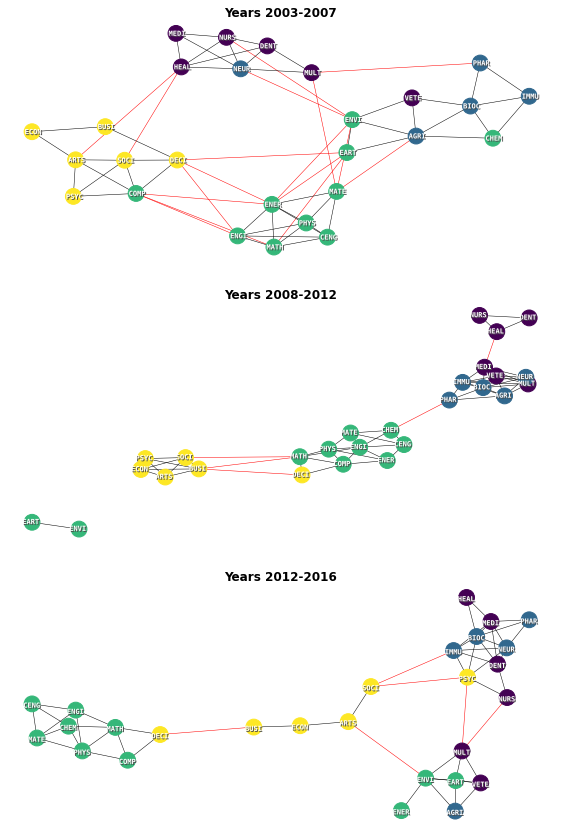

In [10]:
init = [2003, 2008, 2012]
plt.rcParams["figure.figsize"] = (9.8,14.7)

for i in range(len(init)):
    ini = init[i]
    ax = plt.subplot(3,1,i+1)
    draw_one(ax, ini, ini+4, 0.2)
    
# plt.savefig("new plots/bb20.pdf")
plt.show()